In [1]:
#image resizing
#listeyi resme dönüştürme
def image_resize(image,size):
    pil_im=Image.fromarray(uint8(image))
    return array(pil_im.resize(size))

In [2]:
#histogram equalization(eşitleme)
def histogram_equalization(image,number_bins=256):
    imhist,bins=np.histogram(image.flatten(),number_bins,range=(0,255),density=True)
#    cumulative_distribution_function
    cdf=imhist.cumsum()
    cdf=255*cdf/cdf[-1]
    im2=np.interp(image.flatten(),bins[:-1],cdf)
    return im2.reshape(image.shape),cdf,bins


In [ ]:
def compute_average(imlist):
    average_image=np.array(Image.open(imlist[0]),'float32')
    for image_name in imlist[1:]:
        try:
            average_image+=array(Image.open(image_name))
        except:
            print(image_name+"isimli resim devre dışı bırakıldı")
    average_image/=len(imlist)
    return np.array(average_image,'uint8')


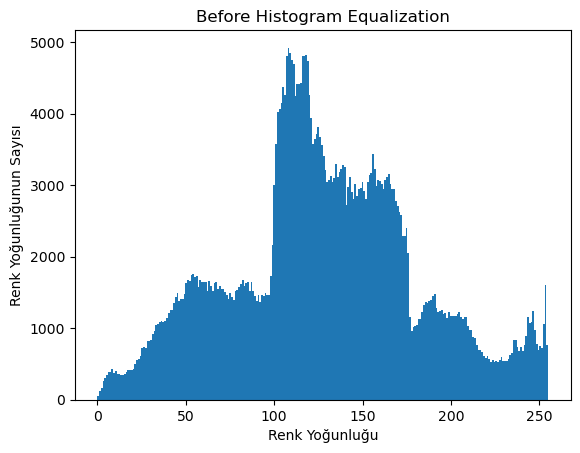

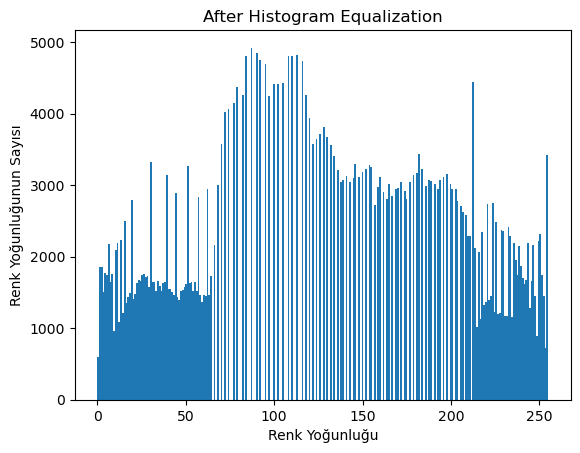

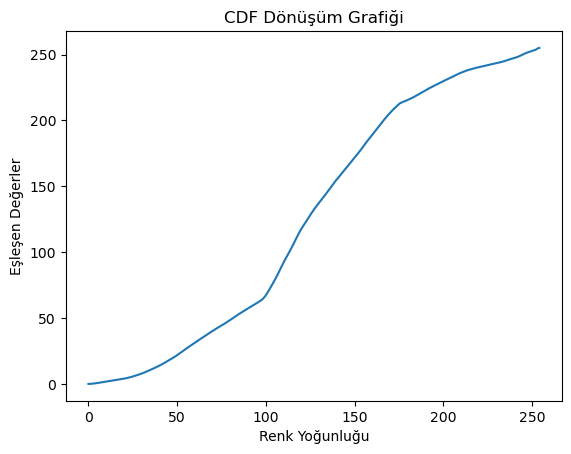

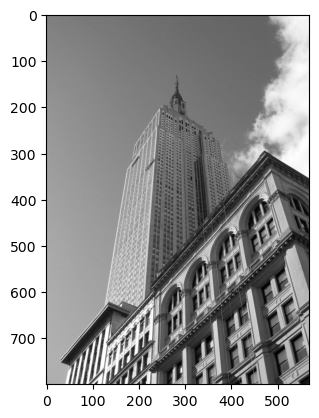

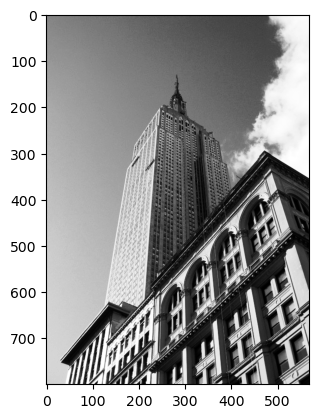

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img=Image.open("empire.jpg").convert('L')
im=np.array(img).astype(np.uint8)

im_equals,cdf,bins=histogram_equalization(im)
im_equals_uint8=np.clip(np.round(im_equals),0,255).astype(np.uint8)
before_path="empire_before.png"
after_path="empire_after.png"
Image.fromarray(im).save(before_path)
Image.fromarray(im_equals_uint8).save(after_path)

plt.figure()
plt.hist(im.flatten(),bins=256,range=(0,255))
plt.title("Before Histogram Equalization")
plt.xlabel("Renk Yoğunluğu")
plt.ylabel("Renk Yoğunluğunun Sayısı")
plt.show()

plt.figure()
plt.hist(im_equals_uint8.flatten(),bins=256,range=(0,255))
plt.title("After Histogram Equalization")
plt.xlabel("Renk Yoğunluğu")
plt.ylabel("Renk Yoğunluğunun Sayısı")
plt.show()

plt.figure()
plt.plot(bins[:-1],cdf)
plt.title("CDF Dönüşüm Grafiği")
plt.xlabel("Renk Yoğunluğu")
plt.ylabel("Eşleşen Değerler")
plt.show()

plt.figure()
plt.imshow(im,cmap="gray")
plt.title("eski resim")

plt.show()

plt.figure()
plt.imshow(im_equals_uint8,cmap="gray")
plt.title="eski resim"
plt.show()